Exercício 1 – Criar mapa centrado no Porto

In [76]:
import folium

# Coordenadas de São Mamede de Infesta (Porto)
latitude = 41.1832
longitude = -8.6110

# Criar o mapa
mapa_porto = folium.Map(location=[latitude, longitude], zoom_start=13, tiles='OpenStreetMap')

# Salvar como arquivo HTML
mapa_porto.save("mapa_porto.html")



Exercício 2 – Adicionar 5 marcadores com popup e tooltip

In [77]:
import folium

# Mapa base centrado em São Mamede de Infesta
mapa_porto = folium.Map(location=[41.1832, -8.6110], zoom_start=13, tiles='OpenStreetMap')

# Lista de locais turísticos com coordenadas
locais_turisticos = [
    {"nome": "Torre dos Clérigos", "lat": 41.1456, "lon": -8.6140},
    {"nome": "Livraria Lello", "lat": 41.1473, "lon": -8.6150},
    {"nome": "Ponte Dom Luís I", "lat": 41.1403, "lon": -8.6111},
    {"nome": "Palácio da Bolsa", "lat": 41.1413, "lon": -8.6156},
    {"nome": "Jardim do Palácio de Cristal", "lat": 41.1512, "lon": -8.6252}
]

# Adicionar marcadores
for local in locais_turisticos:
    folium.Marker(
        location=[local["lat"], local["lon"]],
        popup=f"<b>{local['nome']}</b>",
        tooltip=local["nome"]
    ).add_to(mapa_porto)

# Salvar o mapa
mapa_porto.save("mapa_turistico_porto.html")

Exercício 3 – Agrupar os marcadores com MarkerCluster

In [78]:
import folium
from folium.plugins import MarkerCluster

# Mapa base
mapa_porto = folium.Map(location=[41.1832, -8.6110], zoom_start=13, tiles='OpenStreetMap')

# Locais turísticos
locais_turisticos = [
    {"nome": "Torre dos Clérigos", "lat": 41.1456, "lon": -8.6140},
    {"nome": "Livraria Lello", "lat": 41.1473, "lon": -8.6150},
    {"nome": "Ponte Dom Luís I", "lat": 41.1403, "lon": -8.6111},
    {"nome": "Palácio da Bolsa", "lat": 41.1413, "lon": -8.6156},
    {"nome": "Jardim do Palácio de Cristal", "lat": 41.1512, "lon": -8.6252}
]

# Criar cluster
cluster = MarkerCluster().add_to(mapa_porto)

# Adicionar marcadores ao cluster
for local in locais_turisticos:
    folium.Marker(
        location=[local["lat"], local["lon"]],
        popup=f"<b>{local['nome']}</b>",
        tooltip=local["nome"]
    ).add_to(cluster)

# Salvar mapa
mapa_porto.save("mapa_cluster_porto.html")

Exercício 4 – Adicionar círculo em volta da Livraria Lello

In [79]:
import folium
from folium.plugins import MarkerCluster

# Mapa base
mapa_porto = folium.Map(location=[41.1832, -8.6110], zoom_start=13, tiles='OpenStreetMap')

# Locais turísticos
locais_turisticos = [
    {"nome": "Torre dos Clérigos", "lat": 41.1456, "lon": -8.6140},
    {"nome": "Livraria Lello", "lat": 41.1473, "lon": -8.6150},
    {"nome": "Ponte Dom Luís I", "lat": 41.1403, "lon": -8.6111},
    {"nome": "Palácio da Bolsa", "lat": 41.1413, "lon": -8.6156},
    {"nome": "Jardim do Palácio de Cristal", "lat": 41.1512, "lon": -8.6252}
]

# Criar cluster
cluster = MarkerCluster().add_to(mapa_porto)

# Adicionar marcadores
for local in locais_turisticos:
    folium.Marker(
        location=[local["lat"], local["lon"]],
        popup=f"<b>{local['nome']}</b>",
        tooltip=local["nome"]
    ).add_to(cluster)

# Adicionar círculo colorido na Livraria Lello
folium.Circle(
    location=[41.1473, -8.6150],
    radius=150,  # raio em metros
    color='purple',
    fill=True,
    fill_color='lavender',
    fill_opacity=0.5,
    popup="Área destacada: Livraria Lello"
).add_to(mapa_porto)

# Salvar mapa
mapa_porto.save("mapa_circulo_porto.html")

Exercício 5 – Separar locais em categorias com FeatureGroup

In [80]:
import folium
from folium.plugins import MarkerCluster

# Mapa base
mapa_porto = folium.Map(location=[41.1832, -8.6110], zoom_start=13, tiles='OpenStreetMap')

# FeatureGroups para categorias
grupo_museus = folium.FeatureGroup(name='Museus e Patrimônio')
grupo_parques = folium.FeatureGroup(name='Espaços Verdes')

# Locais categorizados
museus = [
    {"nome": "Torre dos Clérigos", "lat": 41.1456, "lon": -8.6140},
    {"nome": "Livraria Lello", "lat": 41.1473, "lon": -8.6150},
    {"nome": "Palácio da Bolsa", "lat": 41.1413, "lon": -8.6156}
]

parques = [
    {"nome": "Jardim do Palácio de Cristal", "lat": 41.1512, "lon": -8.6252},
    {"nome": "Ponte Dom Luís I", "lat": 41.1403, "lon": -8.6111}  # não é parque, mas vamos supor que entra como paisagem urbana
]

# Adicionar marcadores por categoria
for local in museus:
    folium.Marker(
        location=[local["lat"], local["lon"]],
        popup=f"<b>{local['nome']}</b>",
        tooltip=local["nome"],
        icon=folium.Icon(color='darkblue', icon='info-sign')
    ).add_to(grupo_museus)

for local in parques:
    folium.Marker(
        location=[local["lat"], local["lon"]],
        popup=f"<b>{local['nome']}</b>",
        tooltip=local["nome"],
        icon=folium.Icon(color='green', icon='leaf')
    ).add_to(grupo_parques)

# Adicionar os grupos ao mapa
grupo_museus.add_to(mapa_porto)
grupo_parques.add_to(mapa_porto)

# Salvar mapa
mapa_porto.save("mapa_categorias_porto.html")

Exercício 6 – Adicionar GeoJSON ao mapa

In [81]:
import folium

# Mapa base
mapa_geojson = folium.Map(location=[41.1832, -8.6110], zoom_start=10)

# GeoJSON fictício com polígonos de exemplo
geojson_distritos = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {"Distrito": "Porto"},
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [-8.75, 41.20],
                    [-8.55, 41.20],
                    [-8.55, 41.00],
                    [-8.75, 41.00],
                    [-8.75, 41.20]
                ]]
            }
        }
    ]
}

# Adicionar GeoJSON ao mapa
folium.GeoJson(
    geojson_distritos,
    name="Limites Distritais",
    tooltip=folium.GeoJsonTooltip(fields=["Distrito"], aliases=["Distrito:"])
).add_to(mapa_geojson)

# Salvar mapa
mapa_geojson.save("mapa_distritos_geojson.html")

Exercício 7 – Mapa Choroplético com dados populacionais

In [82]:
import folium
import pandas as pd

# Mapa base
mapa_choropleth = folium.Map(location=[41.1832, -8.6110], zoom_start=6, tiles='CartoDB positron')

# Dados populacionais simulados
populacao_df = pd.DataFrame({
    'Distrito': ['Porto', 'Lisboa', 'Coimbra'],
    'Populacao': [1600000, 2100000, 460000]
})

# GeoJSON simplificado com polígonos fictícios
geojson_distritos = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {"Distrito": "Porto"},
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [-8.9, 41.30],
                    [-8.3, 41.30],
                    [-8.3, 41.00],
                    [-8.9, 41.00],
                    [-8.9, 41.30]
                ]]
            }
        },
        {
            "type": "Feature",
            "properties": {"Distrito": "Lisboa"},
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [-9.4, 38.90],
                    [-8.9, 38.90],
                    [-8.9, 38.60],
                    [-9.4, 38.60],
                    [-9.4, 38.90]
                ]]
            }
        },
        {
            "type": "Feature",
            "properties": {"Distrito": "Coimbra"},
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [-8.5, 40.30],
                    [-8.0, 40.30],
                    [-8.0, 40.00],
                    [-8.5, 40.00],
                    [-8.5, 40.30]
                ]]
            }
        }
    ]
}

# Mapa choroplético
folium.Choropleth(
    geo_data=geojson_distritos,
    name="População por Distrito",
    data=populacao_df,
    columns=["Distrito", "Populacao"],
    key_on="feature.properties.Distrito",
    fill_color="YlGnBu",  # Gradiente azul-esverdeado
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="População estimada"
).add_to(mapa_choropleth)

# Salvar mapa
mapa_choropleth.save("mapa_choropleth_populacao.html")

Exercício 8 – Alterar esquema de cores e opacidade

In [83]:
import folium
import pandas as pd

# Mapa base
mapa_choropleth = folium.Map(location=[41.1832, -8.6110], zoom_start=6, tiles='CartoDB positron')

# Dados populacionais simulados
populacao_df = pd.DataFrame({
    'Distrito': ['Porto', 'Lisboa', 'Coimbra'],
    'Populacao': [1600000, 2100000, 460000]
})

# GeoJSON simplificado
geojson_distritos = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {"Distrito": "Porto"},
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [-8.9, 41.30],
                    [-8.3, 41.30],
                    [-8.3, 41.00],
                    [-8.9, 41.00],
                    [-8.9, 41.30]
                ]]
            }
        },
        {
            "type": "Feature",
            "properties": {"Distrito": "Lisboa"},
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [-9.4, 38.90],
                    [-8.9, 38.90],
                    [-8.9, 38.60],
                    [-9.4, 38.60],
                    [-9.4, 38.90]
                ]]
            }
        },
        {
            "type": "Feature",
            "properties": {"Distrito": "Coimbra"},
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [-8.5, 40.30],
                    [-8.0, 40.30],
                    [-8.0, 40.00],
                    [-8.5, 40.00],
                    [-8.5, 40.30]
                ]]
            }
        }
    ]
}

# Mapa choroplético com novo estilo
folium.Choropleth(
    geo_data=geojson_distritos,
    name="População por Distrito",
    data=populacao_df,
    columns=["Distrito", "Populacao"],
    key_on="feature.properties.Distrito",
    fill_color="BuPu",           # ← nova paleta de cor
    fill_opacity=0.6,            # ← opacidade ajustada
    line_opacity=0.3,
    legend_name="População estimada"
).add_to(mapa_choropleth)

# Salvar mapa
mapa_choropleth.save("mapa_choropleth_bupu.html")

Exercício 9 – Adicionar LayerControl ao mapa

In [84]:
import folium
from folium.plugins import MarkerCluster

# Mapa base
mapa_porto = folium.Map(location=[41.1832, -8.6110], zoom_start=13)

# Grupos de categorias
grupo_museus = folium.FeatureGroup(name='Museus e Patrimônio')
grupo_parques = folium.FeatureGroup(name='Espaços Verdes')

# Locais categorizados
museus = [
    {"nome": "Torre dos Clérigos", "lat": 41.1456, "lon": -8.6140},
    {"nome": "Livraria Lello", "lat": 41.1473, "lon": -8.6150},
    {"nome": "Palácio da Bolsa", "lat": 41.1413, "lon": -8.6156}
]

parques = [
    {"nome": "Jardim do Palácio de Cristal", "lat": 41.1512, "lon": -8.6252},
    {"nome": "Ponte Dom Luís I", "lat": 41.1403, "lon": -8.6111}
]

# Adicionar marcadores aos grupos
for local in museus:
    folium.Marker(
        location=[local["lat"], local["lon"]],
        popup=local["nome"],
        tooltip=local["nome"],
        icon=folium.Icon(color='darkblue')
    ).add_to(grupo_museus)

for local in parques:
    folium.Marker(
        location=[local["lat"], local["lon"]],
        popup=local["nome"],
        tooltip=local["nome"],
        icon=folium.Icon(color='green')
    ).add_to(grupo_parques)

# Adicionar grupos ao mapa
grupo_museus.add_to(mapa_porto)
grupo_parques.add_to(mapa_porto)

# Adicionar LayerControl para alternar entre grupos
folium.LayerControl().add_to(mapa_porto)

# Salvar mapa
mapa_porto.save("mapa_com_layercontrol.html")

Exercício 10 – Guardar o mapa como ficheiro HTML

In [85]:
# Salvar mapa completo com todas as camadas
mapa_porto.save("meu_mapa.html")

Treinando : criando mapa completo 

In [86]:
import folium
import pandas as pd

# 🔍 Mapa base centrado em São Mamede de Infesta
mapa = folium.Map(location=[41.1832, -8.6110], zoom_start=13, tiles='CartoDB positron')

# 🗺️ Locais turísticos com categorias
locais_turisticos = [
    {"nome": "Torre dos Clérigos", "lat": 41.1456, "lon": -8.6140, "categoria": "Museus"},
    {"nome": "Livraria Lello", "lat": 41.1473, "lon": -8.6150, "categoria": "Museus"},
    {"nome": "Palácio da Bolsa", "lat": 41.1413, "lon": -8.6156, "categoria": "Museus"},
    {"nome": "Jardim do Palácio de Cristal", "lat": 41.1512, "lon": -8.6252, "categoria": "Espaços Verdes"},
    {"nome": "Ponte Dom Luís I", "lat": 41.1403, "lon": -8.6111, "categoria": "Espaços Verdes"}
]

# 🎯 Grupos de camada
grupo_museus = folium.FeatureGroup(name='Museus e Patrimônio', show=True)
grupo_parques = folium.FeatureGroup(name='Espaços Verdes', show=True)

# ➕ Adicionar marcadores
for local in locais_turisticos:
    grupo = grupo_museus if local["categoria"] == "Museus" else grupo_parques
    folium.Marker(
        location=[local["lat"], local["lon"]],
        popup=local["nome"],
        tooltip=local["nome"],
        icon=folium.Icon(color='blue' if local["categoria"] == "Museus" else 'green')
    ).add_to(grupo)

# 🎨 Círculo em volta da Livraria Lello
folium.Circle(
    location=[41.1473, -8.6150],
    radius=150,
    color='purple',
    fill=True,
    fill_color='lavender',
    fill_opacity=0.5,
    popup="Área destacada: Livraria Lello"
).add_to(grupo_museus)

# ➕ Adicionar grupos ao mapa
grupo_museus.add_to(mapa)
grupo_parques.add_to(mapa)

# 📁 GeoJSON fictício
geojson_distritos = {
    "type": "FeatureCollection",
    "features": [{
        "type": "Feature",
        "properties": {"Distrito": "Porto"},
        "geometry": {
            "type": "Polygon",
            "coordinates": [[
                [-8.75, 41.20], [-8.55, 41.20], [-8.55, 41.00], [-8.75, 41.00], [-8.75, 41.20]
            ]]
        }
    }]
}

# 🗺️ Adicionar GeoJSON com tooltip
folium.GeoJson(
    geojson_distritos,
    name="Limites Distritais",
    tooltip=folium.GeoJsonTooltip(fields=["Distrito"], aliases=["Distrito:"])
).add_to(mapa)

# 📊 Dados populacionais simulados
populacao_df = pd.DataFrame({
    'Distrito': ['Porto'],
    'Populacao': [1600000]
})

# 🌈 Mapa choroplético
folium.Choropleth(
    geo_data=geojson_distritos,
    name="População por Distrito",
    data=populacao_df,
    columns=["Distrito", "Populacao"],
    key_on="feature.properties.Distrito",
    fill_color="BuPu",
    fill_opacity=0.6,
    line_opacity=0.3,
    legend_name="População estimada"
).add_to(mapa)

# ✅ LayerControl desdobrado por padrão
folium.LayerControl(collapsed=False).add_to(mapa)

# 💾 Salvar mapa final
mapa.save("mapa_super_completo.html")

Criando um Dashboard turístico e urbanístico do Porto

In [87]:
import folium
from folium import Choropleth, Marker, LayerControl, Popup, FeatureGroup
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# === 1. Mapa Base ===
mapa = folium.Map(location=[41.1579, -8.6291], zoom_start=12, tiles="CartoDB positron")

# === 2. Camadas Temáticas ===
museus = FeatureGroup(name="Museus")
espacos_verdes = FeatureGroup(name="Espaços Verdes")
monumentos = FeatureGroup(name="Monumentos Históricos")

# === 3. Marcadores de exemplo ===
locais = [
    {"nome": "Museu Soares dos Reis", "lat": 41.1455, "lon": -8.6140, "tipo": "Museu"},
    {"nome": "Jardim do Palácio de Cristal", "lat": 41.1496, "lon": -8.6232, "tipo": "Parque"},
    {"nome": "Sé do Porto", "lat": 41.1421, "lon": -8.6110, "tipo": "Monumento"},
]

for local in locais:
    popup = Popup(f"<b>{local['nome']}</b><br>Tipo: {local['tipo']}", max_width=250)
    marcador = Marker(location=[local["lat"], local["lon"]], popup=popup)
    
    if local["tipo"] == "Museu":
        museus.add_child(marcador)
    elif local["tipo"] == "Parque":
        espacos_verdes.add_child(marcador)
    else:
        monumentos.add_child(marcador)

# === 4. Dados populacionais simulados ===
dados_populacao = pd.DataFrame({
    "distrito": ["PORTO", "BRAGA", "AVEIRO", "VIANA DO CASTELO"],  # Nomes padronizados em maiúsculas
    "populacao": [214000, 181000, 148000, 88200]
})

# === 5. GeoJSON dos distritos ===
geojson_path = "georef-portugal-distrito.geojson"
gdf = gpd.read_file(geojson_path)

# === 6. Visualizar colunas disponíveis no GeoJSON ===
print("Colunas disponíveis no GeoJSON:")
print(gdf.columns)

# === 7. Padroniza nomes para facilitar o merge ===
gdf["dis_name"] = gdf["dis_name"].str.upper().str.strip()
dados_populacao["distrito"] = dados_populacao["distrito"].str.upper().str.strip()

# === 8. Merge com dados populacionais ===
gdf = gdf.merge(dados_populacao, left_on="dis_name", right_on="distrito")

# === 9. Choropleth ===
Choropleth(
    geo_data=gdf,
    data=gdf,
    columns=["dis_name", "populacao"],
    key_on="feature.properties.dis_name",
    fill_color="YlGnBu",
    fill_opacity=0.6,
    line_opacity=0.5,
    legend_name="População por Distrito"
).add_to(mapa)

# === 10. Adiciona camadas e controle ===
museus.add_to(mapa)
espacos_verdes.add_to(mapa)
monumentos.add_to(mapa)
LayerControl(collapsed=False).add_to(mapa)

# === 11. Exporta como HTML ===
mapa.save("dashboard_porto.html")
print("✅ Dashboard gerado como 'dashboard_porto.html'!")

Colunas disponíveis no GeoJSON:
Index(['geo_point_2d', 'year', 'dis_code', 'dis_name', 'dis_name_upper',
       'dis_name_lower', 'dis_area_code', 'dis_type', 'geometry'],
      dtype='object')
✅ Dashboard gerado como 'dashboard_porto.html'!


Gráfico Populacional 

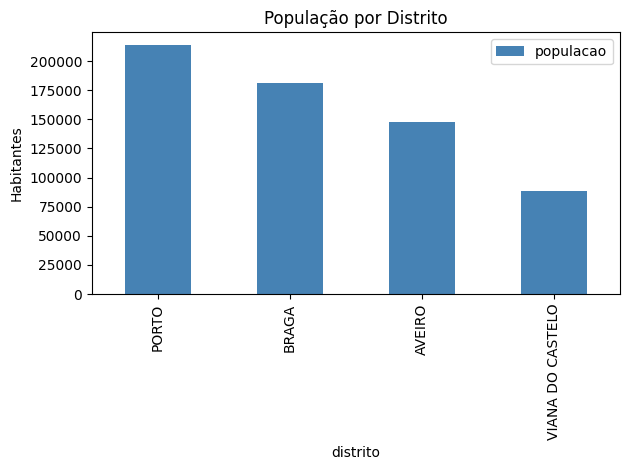

In [88]:
# Cria gráfico de barras com população por distrito
dados_populacao.plot(x="distrito", y="populacao", kind="bar", color="steelblue", title="População por Distrito")
plt.ylabel("Habitantes")
plt.tight_layout()
plt.savefig("grafico_populacao.png")
plt.show()